# Balmer Series Lab Notebook
## Ryan Gale

## Table of Contents
1. Overview, Lab Setup and Project Goals 2/19/19 
2. Calibrating with Mercury Spectrum 2/21 + 2/28/19
3. Measuring the Balmer series wavelengths 3/5 + 3/7/19

### 1 Overview, Lab Setup, and Project Goals

Overview:
The classical theory of the Hydrogen atom predicted the electron orbiting around the proton and a corresponding continuous emission spectra.  The electron was known to have wave-like properties with its wavelength given by $$\lambda=\dfrac{h}{p}$$ where $h$ is Planck's constant and $p$ is the electron's momentum.  Further, light was known to be emitted from excited Hydrogen atoms in quanta of energy, called photons, with the wavelength of emitted light given by: $$\epsilon=\dfrac{hc}{\lambda}=h\nu$$
where $c$ is the speed of light, $\nu$ is the frequency, and $\lambda$ is the wavelength.  Collision experiments argued for a planetary model with the electron orbiting around the proton.  However, the classical model predicted the electron radiating all of its energy away over a continuous range of wavelengths.
Bohr's quantum model postulated that the atom can only exist in certain discrete energy states and that light is emitted only when the atom changes from one state to another.  He developed the following expression for the energy levels of the Hydrogen atom: $$E_n=-\dfrac{me^4}{32\pi^2\epsilon_0^2\hbar^2n^2}$$
Light is only emitted when there is a transition from a higher energy level to a lower one, where the wavelength of emitted light is given by: $\dfrac{hc}{\lambda}=E_n-E_{n'}$.  Plugging this into the equation for the energy levels of Hydrogen we get:<br/>
$$\dfrac{1}{\lambda}=R\big(\dfrac{1}{(n')^2}-\dfrac{1}{n^2}\big)$$
Where $R=\dfrac{me^4}{8\epsilon_0^2h^3c}$ is the Rydberg constant.  Bohr's theory therefore tells us the wavelengths of emitted light when the atom changes its quantum number from $n$ to $n'$.  We are interested in the Balmer series of emissions and will be investigating the emissions relative to $n'=2$

Experiment setup:
A hydrogen lamp, spectrometer, and diffraction grating allow us to measure the emission spectra precisely.  The following diagram reveals the components of the spectrometer:    

<img src="spectrometer.gif" alt="drawing" width="500"/>

By shining the light from the hydrogen lamp onto the collimator, the rays are focused into parallel lines.  These rays strike perpendicular to the diffraction grating.  Finally, the diffracted rays are obeserved in the eyepiece.  The spectrometer is fitted with a Vernier scale to measure the angle of the spectral lines observed in the eyepiece. 

Goals:
The first goal for this lab is to verify that the Balmer Series wavelengths are inversely proportional to $\dfrac{1}{2^2}-\dfrac{1}{n^2}$ where $n=3,4,5...$.  Further I will be measuring the proportionality constant of this relation known as the Rydberg constant. 

Callibration steps:
1. Use a flashlight to align the collimator and eyepiece.  We want the slit to match the width of the crosshairs and the slit to be in focus.
2. 
How to read a Vernier Scale:
1. Read the leftmost aligned mainscale reading.
2. Read Vernier scale reading
Angle of main scale + (vernier reading * least scale (1 minute in our case)) 

### 2. Calibrating with Mercury Spectrum

Background: Diffraction Grating Theory <br/>
<br/>
Estimate d for calibration on mercury, then use d to predict the emission spectra of Hydrogen.  For mode $m$ of the diffraction spectra, wavelength $\lambda$, and incident angle $\theta_i$ we can compute $\theta_m$:
$$\theta_m=arcsin(sin\theta_i - \dfrac{m\lambda}{d})$$

Before I can measure the wavelengths in the Balmer series I have to measure the separation of the slits in the diffraction grating.  Mercury has a vivid spectrum with known wavelengths so I will use this to estimate the slit distance $d$. <br/><br/>
After calibrating the spectrometer I discussed the initial angle of the eyepiece with Chris D'Aquino.  My position was that we should acknowledge the initial resting angle of the calibrated eyepiece because it will affect the difference between positive and negative $\theta_m$ measurements (i.e. when we measure the spectral line swinging the eyepiece left of the diffraction grating, and then measuring the correponding angle swinging right of the diffraction grating).  

I am making my initial measurements of the diffraction grating separation which is stated to be $1.67 nm$
<br/>
I am measuring the angle of diffraction for the blue 435.835 nm wavelength emission.  The following code takes the degree measurements and calculates the standard deviation $\sigma_{\theta_m}$. 
<br/>

In [1]:
import math
import numpy as np
min_con = 0.0166666666666667 # convert minutes to degrees
m1_angle1 = (360 - (359+20*min_con)) + (14 + 45*min_con)
m_minus1_angle1 = (359 + 17*min_con) - (343 + 48*min_con)
m1_angle2 = (360 - (359+21*min_con)) + (14 + 54*min_con)
m_minus1_angle2 = (359 + 21*min_con) - (343 + 55*min_con)
m1_angle3 = (360 - (359+24*min_con)) + (14 + 49*min_con)
m_minus1_angle3 = (359 + 23*min_con) - (343 + 57*min_con)
m1_angle4 = (360 - (359+23*min_con)) + (14 + 50*min_con)
m_minus1_angle4 = (359 + 23*min_con) - (343 + 57*min_con)

# convert measurements to radians
theta_m1 = np.array(list(map(math.radians,[m1_angle1,m1_angle2,m1_angle3,m1_angle4])))
theta_m_minus1 = np.array(list(map(math.radians,[m_minus1_angle1,m_minus1_angle2,m_minus1_angle3,m_minus1_angle4])))

# std of theta
sigma_theta_m1 = np.std(theta_m1)
sigma_theta_m_minus1 = np.std(theta_m_minus1)

Using the relation $\theta_m=arcsin(sin\theta_i - \dfrac{m\lambda}{d})$, we can compute the slit separation $d$.  The insident angle $\theta_i=0$ because the light from the collimator is striking the diffraction grating directly.  Now we must compute the difference between our zero measure and the blue spectral line in order to get our value of $\theta_m$.  I'm investigating the first order line $m=1$ and $m=-1$.<br/><br/>
To find the standard deviation in the diffraction slit width $d$, we compute the propogated error:
$$\sigma_d^2 = m^2\lambda^2 \sigma_{\theta}^2 \Big (\dfrac{\partial{\ csc(\theta_m)}}{\partial{\ \theta_m}}\Big )^2$$
Evaluating this gives us the standard deviation for $\sigma_d$:
$$\sigma_d = |m|\lambda \sigma_{\theta} \dfrac{cos(\theta_m)}{sin^2(\theta_m)}$$


In [2]:
lambda_blue = 435.835e-9

# Estimation of slit width, d
def slit_width (m, theta_m, wavelength): 
    return abs((-m*wavelength)/np.sin(theta_m))

d_m1 = slit_width(1, theta_m1, lambda_blue)
d_m_minus1 = slit_width(-1, theta_m_minus1, lambda_blue)

# final estimate of d
d = (np.average(d_m1) + np.average(d_m_minus1))/2.

# in one mm of grating there are n slits
n = 1e-3/d

print("----- ESTIMATES -----")
print("\nd = " + str(d) + "m")
print("\n# of slits per mm = " + str(n))

# Error Propogation for the standard deviation of slit width, d
def propogated_slit_error (sigma_theta, m, theta_m, wavelength):
    return (abs(m)*wavelength*sigma_theta*np.cos(theta_m))/(np.sin(theta_m)**2)

sigma_d_m1 = propogated_slit_error (sigma_theta_m1, 1, theta_m1, lambda_blue)
sigma_d_m_minus1 = propogated_slit_error (sigma_theta_m_minus1, -1, theta_m_minus1, lambda_blue)

# standard deviation is the average of the computed sigma_d over the total number of measurements
std_d_m1 = np.average(sigma_d_m1)
std_d_m_minus1 = np.average(sigma_d_m_minus1)

# overall sigma_d is the average of the m=1 and m=-1 standard deviations
std_d = (std_d_m1+std_d_m_minus1)/2.

# standard error of d
std_err_d = std_d/math.sqrt(8)

#standard error of # of slits per mm
std_n = n - 1e-3/(d + std_err_d)

print("\n\n----- STANDARD ERROR -----")
print("\nd = +/-" + str(std_err_d) + "m")
print("\n# of slits per mm = +/-" + str(std_n))

----- ESTIMATES -----

d = 1.6358302597376476e-06m

# of slits per mm = 611.3103691824228


----- STANDARD ERROR -----

d = +/-1.392585277666126e-09m

# of slits per mm = +/-0.5199669811595413


### 3. Measuring the Balmer series wavelengths

With the measurement of $d$ we can now use the diffraction equation to estimate the wavelength of the Balmer series spectral lines. Solving the diffraction equation for $\lambda$ gives us:
$$\lambda = \dfrac{d\cdot sin(\theta_m)}{m}$$
My measurements of the first 5 lines of the Balmer series with first and second order lines is calculated below:

In [3]:
min_con = 0.0166666666666667 # convert minutes to degrees

# n=6 transition first order term (navy blue: 410.17nm)
n6_angle1 = (360 - (359+22*min_con)) + (13 + 52*min_con)
n6_angle2 = (359 + 21*min_con) - (344 + 47*min_con)
n6_angle3 = (360 - (359+22*min_con)) + (13 + 57*min_con)
n6_angle4 = (359 + 22*min_con) - (344 + 51*min_con)

# n=5 transition first order term (purple: 434.05nm)
n5_angle1 = (360 - (359+22*min_con)) + (14 + 30*min_con)
n5_angle2 = (359 + 21*min_con) - (343 + 55*min_con)
n5_angle3 = (360 - (359+22*min_con)) + (14 + 58*min_con)
n5_angle4 = (359 + 22*min_con) - (343 + 57*min_con)

# n=4 transition first order term (aqua: 486.13nm)
n4_angle1 = (360 - (359+22*min_con)) + (16 + 39*min_con)
n4_angle2 = (359 + 21*min_con) - (342 + 0*min_con)
n4_angle3 = (360 - (359+22*min_con)) + (16 + 41*min_con)
n4_angle4 = (359 + 22*min_con) - (342 + 3*min_con)

# n=3 transition first order term (red: 656.28nm)
n3_angle1 = (360 - (359+22*min_con)) + (23 + 3*min_con)
n3_angle2 = (359 + 21*min_con) - (335 + 41*min_con)
n3_angle3 = (360 - (359+22*min_con)) + (23 + 3*min_con)
n3_angle4 = (359 + 22*min_con) - (335 + 41*min_con)

# convert to radians and store in numpy array
n3 = np.array(list(map(math.radians,[n3_angle1,n3_angle2,n3_angle3,n3_angle4])))
n4 = np.array(list(map(math.radians,[n4_angle1,n4_angle2,n4_angle3,n4_angle4])))
n5 = np.array(list(map(math.radians,[n5_angle1,n5_angle2,n5_angle3,n5_angle4])))
n6 = np.array(list(map(math.radians,[n6_angle1,n6_angle2,n6_angle3,n6_angle4])))

# store our p=4 spectral lines, and q=4 angle measurements (per line) as a pxq matrix
thetas = np.array((n3,n4,n5,n6))

# std of theta
sigma_thetas = np.std(thetas,axis=1)
sigma_thetas

array([0.00012596, 0.00041138, 0.0029261 , 0.00059968])

The wavelength is computed by:
$$\lambda = \dfrac{d\cdot sin(\theta_m)}{m}$$

To find the standard deviation in our estimated wavelength, we compute the propogated error:
$$\sigma_{\lambda}^2 = (\dfrac{d\sigma_{\theta}}{m})^2\Big(\dfrac{\partial}{\partial \theta}sin\theta\Big)^2 $$
Evaluating this gives us the standard deviation for $\lambda$:
$$\sigma_{\lambda} = \dfrac{d\sigma_{\theta}cos\theta}{m}$$


In [4]:
def wavelength(d,theta,m):
    return d*np.sin(theta)/m

# compute wavelengths for each spectral line
thetas = np.average(thetas,axis = 1)
d = 1.6358302597e-6
m = 1

wavelengths = wavelength(d,thetas,m)

print("----- ESTIMATES -----")
print("\n lambda n3 = " + str(wavelengths[0]) + "m")
print("\n lambda n4 = " + str(wavelengths[1]) + "m")
print("\n lambda n5 = " + str(wavelengths[2]) + "m")
print("\n lambda n6 = " + str(wavelengths[3]) + "m")



# Error Propogation for the standard deviation of lambda
def propogated_lambda_error (sigma_theta, m, theta_m):
    return d*sigma_theta*np.cos(theta_m)/m

lambda_err = propogated_lambda_error(sigma_thetas, m, thetas)

print("\n\n----- STANDARD ERROR -----")
print("\n lambda n3 error = " + str(lambda_err[0]) + "m")
print("\n lambda n4 error = " + str(lambda_err[1]) + "m")
print("\n lambda n5 error = " + str(lambda_err[2]) + "m")
print("\n lambda n6 error = " + str(lambda_err[3]) + "m")

print("\n\n----- Discrepancy with known value -----")
print("\n lambda n3 = " + str(100*abs(wavelengths[0]-6.5645377e-07)/6.5645377e-07))
print("\n lambda n4 = " + str(100*abs(wavelengths[1]-4.8613615e-07)/4.8613615e-07))
print("\n lambda n5 = " + str(100*abs(wavelengths[2]-4.340462e-07)/4.340462e-07))
print("\n lambda n6 = " + str(100*abs(wavelengths[3]-4.10174e-07)/4.10174e-07))

----- ESTIMATES -----

 lambda n3 = 6.56973652034625e-07m

 lambda n4 = 4.869091138474352e-07m

 lambda n5 = 4.342900417955445e-07m

 lambda n6 = 4.1073079612211314e-07m


----- STANDARD ERROR -----

 lambda n3 error = 1.8869906517492735e-10m

 lambda n4 error = 6.424429447865138e-10m

 lambda n5 error = 4.614838408449425e-09m

 lambda n6 error = 9.495516874688145e-10m


----- Discrepancy with known value -----

 lambda n3 = 0.07919552882222958

 lambda n4 = 0.15900151581714375

 lambda n5 = 0.05617876519700711

 lambda n6 = 0.13574632280767773


With our wavelengths for the Balmer series, we can now establish the relation predicted by Bohr:
$$\dfrac{1}{\lambda}=R\big(\dfrac{1}{2^2}-\dfrac{1}{n^2}\big)$$
By plotting $\dfrac{1}{\lambda}$ vs. $\dfrac{1}{2^2}-\dfrac{1}{n^2}$ we can obtain a value for Rydberg's constant.

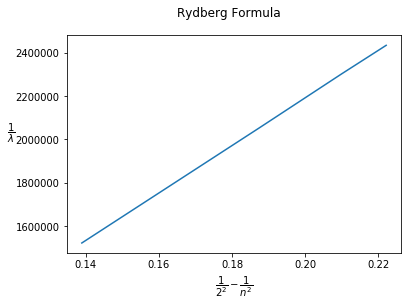

In [8]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as p

n = range(3,7)
balmer = [1/4-1/i**2 for i in n]
inverse = [1/i for i in wavelengths]

p.plot(balmer, inverse)
p.xlabel('$\dfrac{1}{2^2}-\dfrac{1}{n^2}$')
p.ylabel('$\dfrac{1}{\lambda}$',rotation=0)
p.suptitle('Rydberg Formula')
p.savefig('rydberg.png',dpi=1000, bbox_inches='tight')

Rydberg's constant is simply the slope of the above plot:

In [6]:
rydberg = np.average(np.array(inverse))/np.average(np.array(balmer))
print("\n\n----- Rydberg Constant -----\n")
print("R = " + str(rydberg) + " (m^-1)")

print("\n\n----- Discrepancy with Known Constant Value -----\n")
print("R known = " + str(10973731.6) + " (m^-1)")

print("R % difference = " + str(100*abs(rydberg-10973731.6)/10973731.6) + " %")




----- Rydberg Constant -----

R = 10958441.92245164 (m^-1)


----- Discrepancy with Known Constant Value -----

R known = 10973731.6 (m^-1)
R % difference = 0.13932979323423655 %


These results are phenomenal, the accuracy is very high for a device that is so straighforward to use!  It feels great to confirm Bohr's model by first principles.